In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [2]:
folder_path = os.path.join(os.getcwd(), "IMF-CID")

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        print(filename)

00_Indicators_Summary.csv
01_Quarterly_Greenhouse_Gas_GHG_Air_Emissions_Accounts.csv
02_Annual_Greenhouse_Gas_GHG_Air_Emissions_Accounts.csv
03_National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_Nationally_Determined_Contributions_Targets.csv
04_CO2_Emissions_Emissions_Intensities_and_Emissions_Multipliers.csv
05_CO2_Emissions_embodied_in_Domestic_Final_Demand_Production_and_Trade.csv
06_Direct_Investment-related_Indicators.csv
07_Environmental_Taxes.csv
08_Environmental_Protection_Expenditures.csv
09_Fossil_Fuel_Subsidies.csv
10_Renewable_Energy.csv
11_Trade_in_Low_Carbon_Technology_Products.csv
12_Bilateral_Trade_in_Low_Carbon_Technology_Products.csv
13_Forest_and_Carbon.csv
14_Climate-related_Disasters_Frequency.csv
15_Climate-driven_INFORM_Risk.csv
16_IMF-Adapted_ND-GAIN_Index.csv
17_NGFS_Transition_Pathways.csv
18_NGFS_GDP_Losses_and_Benefits.csv
19_Carbon_Tax_to_RevenuesAssets_in_Disclosing_Firms.csv
20_RevenuesAssets_at_Risk_in_Disclosing_Firms.csv
21_

In [3]:
file_path = Path.cwd() / "IMF-CID" / "23_Annual_Surface_Temperature_Change.csv"
df = pd.read_csv(file_path)
df.head(5)

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,1961,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",-0.096,...,1.139,1.588,1.630,1.597,0.951,0.552,1.418,1.967,1.748,2.188
1,Africa,NaN,AFRTMP,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",-0.015,...,1.195,1.385,1.158,1.150,1.290,1.177,1.400,1.014,1.485,1.750
2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",0.643,...,1.702,1.608,1.239,2.155,1.797,1.627,1.719,1.701,2.299,2.925
3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",0.154,...,1.134,1.761,1.506,1.203,1.240,2.006,2.424,1.804,2.303,2.824
4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",0.075,...,0.738,1.268,1.163,0.917,1.268,1.159,0.997,0.984,1.010,1.588


C:\Users\Jacob Doan\AppData\Local\Temp\ipykernel_14220\3516864736.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1_melted, x='TempChange', y='Year', palette=palette)


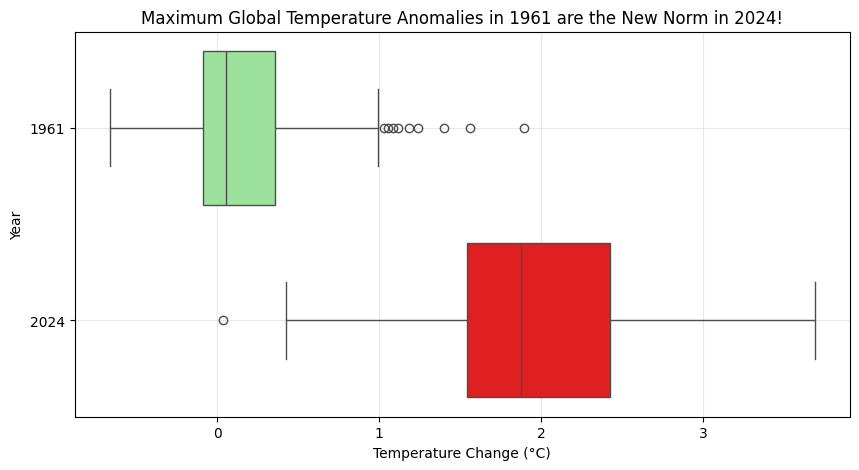

In [4]:
# GRAPH 1: PRO

# select 60 year gap: deceptive
df1 = df[['Country', '1961', '2024']]

# .melt() reshapes wide -> long data, .pivot_table() reshapes long -> wide data
df1_melted = df1.melt(id_vars=['Country'], 
                         value_vars=['1961', '2024'],
                         var_name='Year', 
                         value_name='TempChange')

# plot
# stretch x-axis to emphasize differences: deceptive
plt.figure(figsize=(10, 5))

# color palette as green and red to highlight "good and bad", contrast also emphasizes differences: deceptive 
palette = {'1961': 'lightgreen', '2024': 'red'}
sns.boxplot(data=df1_melted, x='TempChange', y='Year', palette=palette)
plt.title('Maximum Global Temperature Anomalies in 1961 are the New Norm in 2024!')
plt.ylabel('Year')
plt.xlabel('Temperature Change (°C)')
plt.grid(True, color='lightgray', alpha=0.5)
plt.show()

# ANOMALIES/OUTLIERS IN 1961, IS THE NORM IN 2024!!!

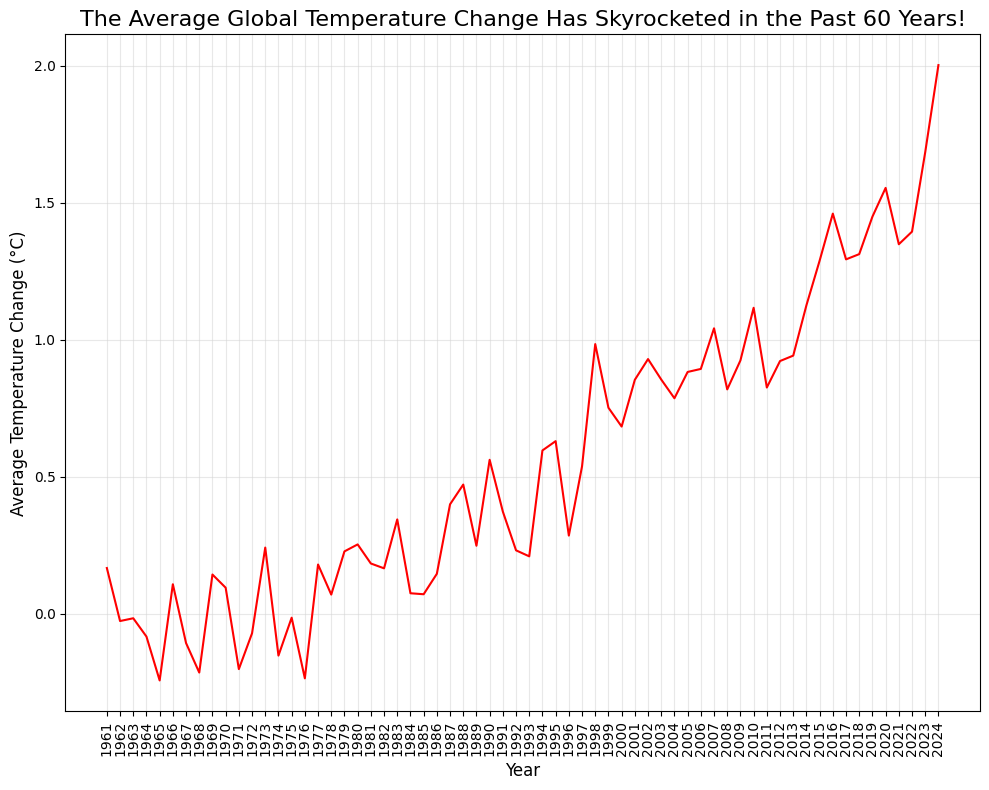

In [5]:
# GRAPH 2: PRO

# drop unecessary columns
df3 = df.copy()
df3 = df3.drop(columns=['ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor'])

# .melt() reshapes wide -> long data, .pivot_table() reshapes long -> wide data
df3_melted = df3.melt(id_vars=['Country'], 
                         value_vars=[str(year) for year in range(1961, 2025)],
                         var_name='Year', 
                         value_name='TempChange')

# groupby
df3_melted_groupby_year = df3_melted.groupby('Year')[['TempChange']].mean()
df3_melted_groupby_year.reset_index(inplace=True)

# plot
# stretch y-axis to emphasize differences: deceptive
plt.figure(figsize=(10, 8))

# line color red because red perceived as "negative"/"bad": deceptive
sns.lineplot(data=df3_melted_groupby_year, x='Year', y='TempChange', color='red')

plt.title('The Average Global Temperature Change Has Skyrocketed in the Past 60 Years!', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature Change (°C)', fontsize=12)
plt.grid(True, color='lightgray', alpha=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# LOOK AT HOW MUCH THE TEMPERATURE IS SKYROCKETING OVER THE PAST FEW DECADES

C:\Users\Jacob Doan\AppData\Local\Temp\ipykernel_14220\2786149628.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2_melted_filtered[df2_melted_filtered['Year'] == '2014']['TempChange'],
C:\Users\Jacob Doan\AppData\Local\Temp\ipykernel_14220\2786149628.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2_melted_filtered[df2_melted_filtered['Year'] == '2024']['TempChange'],


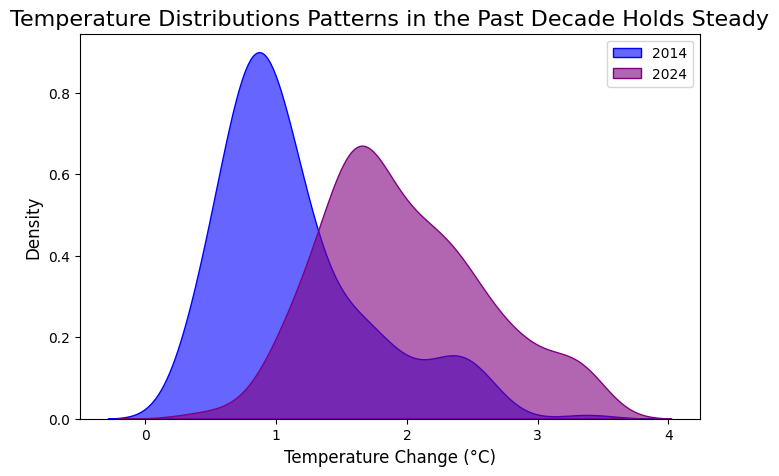

In [6]:
# GRAPH 3: CON

# select only 10 year gap: deceptive
df2 = df[['Country', '2014', '2024']]

# .melt() reshapes wide -> long data, .pivot_table() reshapes long -> wide data
df2_melted = df2.melt(id_vars=['Country'], 
                         value_vars=['2014', '2024'],
                         var_name='Year', 
                         value_name='TempChange')

# filter out outliers: deceptive
q_low = df2_melted['TempChange'].quantile(0.01)
q_high = df2_melted['TempChange'].quantile(0.99)
df2_melted_filtered = df2_melted[(df2_melted['TempChange'] > q_low) & (df2_melted['TempChange'] < q_high)]

# plot
plt.figure(figsize=(8, 5))

# using anagalous colors to downplay difference: deceptive
sns.kdeplot(df2_melted_filtered[df2_melted_filtered['Year'] == '2014']['TempChange'], 
            label='2014', 
            shade=True, color='blue', alpha=0.6)

sns.kdeplot(df2_melted_filtered[df2_melted_filtered['Year'] == '2024']['TempChange'], 
            label='2024', 
            shade=True, color='purple', alpha=0.6)

plt.title('Temperature Distributions Patterns in the Past Decade Holds Steady', fontsize=16)
plt.xlabel('Temperature Change (°C)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

# THERE IS PLENTY OF INTERSECTION BETWEEN THESE TWO GRAPHS. THE "CHANGE" ISNT THAT DRASTIC!

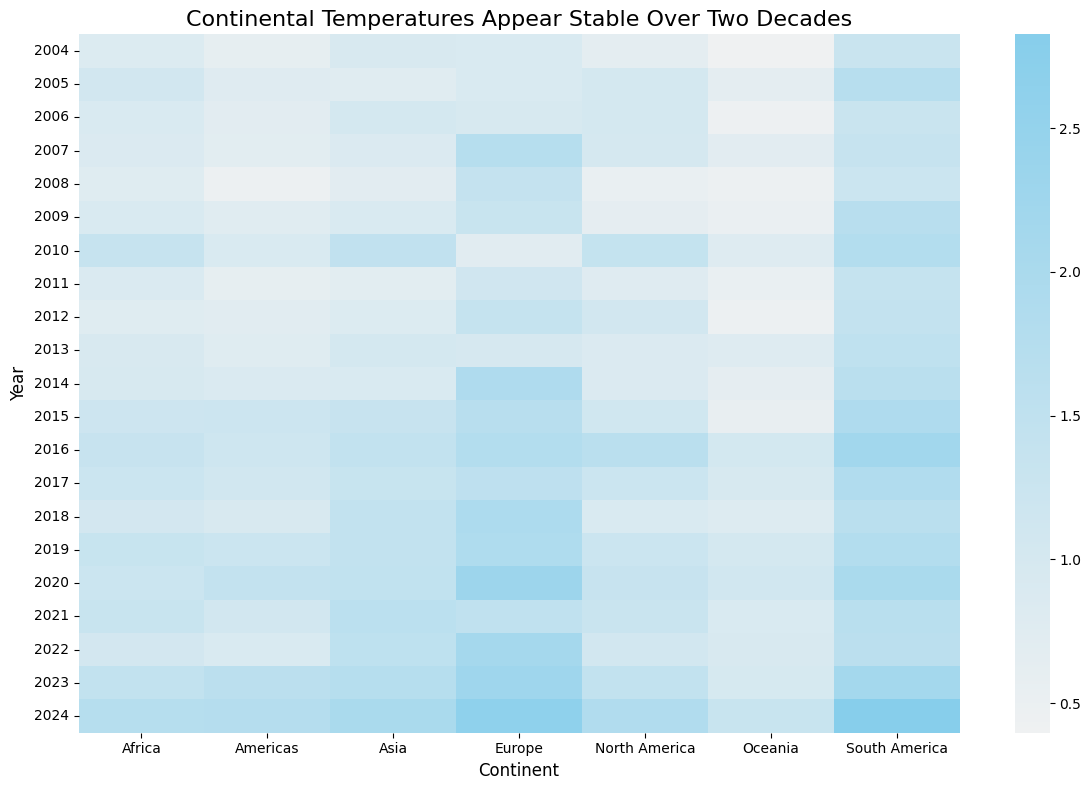

In [ ]:
# GRAPH 4: CON

# country -> continent dict
country_to_continent = {
    'Afghanistan, Islamic Rep. of': 'Asia', 
    'Africa': 'Africa', 
    'Albania': 'Europe', 
    'Algeria': 'Africa',
    'American Samoa': 'Oceania', 
    'Americas': 'Americas', 
    'Andorra, Principality of': 'Europe', 
    'Angola': 'Africa',
    'Anguilla': 'North America', 
    'Antigua and Barbuda': 'Americas', 
    'Argentina': 'Americas', 
    'Armenia, Rep. of': 'Asia', 
    'Aruba, Kingdom of the Netherlands': 'Americas', 
    'Asia': 'Asia', 
    'Australia': 'Oceania',
    'Austria': 'Europe', 
    'Azerbaijan, Rep. of': 'Asia', 
    'Bahamas, The': 'Americas',
    'Bahrain, Kingdom of': 'Asia', 
    'Bangladesh': 'Asia', 
    'Barbados': 'Americas',
    'Belarus, Rep. of': 'Europe', 
    'Belgium': 'Europe', 
    'Belize': 'Americas', 
    'Benin': 'Africa', 
    'Bhutan': 'Asia',
    'Bolivia': 'Americas', 
    'Bosnia and Herzegovina': 'Europe', 
    'Botswana': 'Africa', 
    'Brazil': 'Americas',
    'British Virgin Islands': 'North America', 
    'Brunei Darussalam': 'Asia', 
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa', 
    'Burundi': 'Africa', 
    'Cabo Verde': 'Africa', 
    'Cambodia': 'Asia', 
    'Cameroon': 'Africa',
    'Canada': 'North America', 
    'Cayman Islands': 'North America', 
    'Central African Rep.': 'Africa', 
    'Chad': 'Africa',
    'Chile': 'Americas', 
    'China, P.R.: Hong Kong': 'Asia', 
    'China, P.R.: Macao': 'Asia',
    'China, P.R.: Mainland': 'Asia', 
    'Colombia': 'Americas', 
    'Comoros, Union of the': 'Africa', 
    'Congo, Dem. Rep. of the': 'Africa', 
    'Congo, Rep. of': 'Africa', 
    'Cook Islands': 'Oceania',
    'Costa Rica': 'Americas', 
    'Croatia, Rep. of': 'Europe', 
    'Cuba': 'Americas', 
    'Cyprus': 'Europe', 
    'Czech Rep.': 'Europe',
    'Denmark': 'Europe', 
    'Djibouti': 'Africa', 
    'Dominica': 'Americas', 
    'Dominican Rep.': 'Americas', 
    'Ecuador': 'Americas',
    'Egypt, Arab Rep. of': 'Africa', 
    'El Salvador': 'Americas', 
    'Equatorial Guinea, Rep. of': 'Africa', 
    'Eritrea, The State of': 'Africa', 
    'Estonia, Rep. of': 'Europe',
    'Eswatini, Kingdom of': 'Africa', 
    'Ethiopia, The Federal Dem. Rep. of': 'Africa',
    'Europe': 'Europe', 
    'Falkland Islands (Malvinas)': 'South America', 
    'Faroe Islands': 'Europe',
    'Fiji, Rep. of': 'Oceania', 
    'Finland': 'Europe', 
    'France': 'Europe', 
    'French Polynesia': 'Oceania', 
    'Gabon': 'Africa',
    'Gambia, The': 'Africa', 
    'Georgia': 'Asia', 
    'Germany': 'Europe', 
    'Ghana': 'Africa', 
    'Gibraltar': 'Europe',
    'Greece': 'Europe', 
    'Greenland': 'North America', 
    'Grenada': 'Americas', 
    'Guadeloupe': 'Americas', 
    'Guatemala': 'Americas',
    'Guiana, French': 'South America', 
    'Guinea': 'Africa', 
    'Guinea-Bissau': 'Africa', 
    'Guyana': 'South America', 
    'Haiti': 'Americas',
    'Holy See': 'Europe', 
    'Honduras': 'Americas', 
    'Hungary': 'Europe', 
    'Iceland': 'Europe', 
    'India': 'Asia', 
    'Indonesia': 'Asia',
    'Iran, Islamic Rep. of': 'Asia', 
    'Iraq': 'Asia', 
    'Ireland': 'Europe', 
    'Israel': 'Asia',
    'Italy': 'Europe', 
    'Jamaica': 'Americas', 
    'Japan': 'Asia', 
    'Jordan': 'Asia', 
    'Kazakhstan, Rep. of': 'Asia',
    'Kenya': 'Africa', 
    'Kiribati': 'Oceania', 
    'Korea, Dem. People’s Rep. of': 'Asia', 
    'Korea, Rep. of': 'Asia', 
    'Kuwait': 'Asia',
    'Kyrgyz Republic': 'Asia', 
    'Lao PDR': 'Asia', 
    'Latvia': 'Europe', 
    'Lebanon': 'Asia', 
    'Lesotho': 'Africa',
    'Liberia': 'Africa', 
    'Libya': 'Africa', 
    'Liechtenstein': 'Europe', 
    'Lithuania': 'Europe', 
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa', 
    'Malawi': 'Africa', 
    'Malaysia': 'Asia', 
    'Maldives': 'Asia', 
    'Mali': 'Africa',
    'Malta': 'Europe', 
    'Marshall Islands': 'Oceania', 
    'Mauritania': 'Africa', 
    'Mauritius': 'Africa', 
    'Mexico': 'North America',
    'Micronesia (Federated States of)': 'Oceania', 
    'Moldova, Rep. of': 'Europe', 
    'Monaco': 'Europe', 
    'Mongolia': 'Asia', 
    'Montenegro': 'Europe',
    'Morocco': 'Africa', 
    'Mozambique': 'Africa', 
    'Myanmar': 'Asia', 
    'Namibia': 'Africa', 
    'Nauru': 'Oceania',
    'Nepal': 'Asia', 
    'Netherlands': 'Europe', 
    'New Zealand': 'Oceania', 
    'Nicaragua': 'Americas', 
    'Niger': 'Africa',
    'Nigeria': 'Africa', 
    'North Macedonia': 'Europe', 
    'Norway': 'Europe', 
    'Oman': 'Asia', 
    'Pakistan': 'Asia', 
    'Palau': 'Oceania',
    'Panama': 'Americas', 
    'Papua New Guinea': 'Oceania', 
    'Paraguay': 'Americas', 
    'Peru': 'Americas', 
    'Philippines': 'Asia',
    'Poland': 'Europe', 
    'Portugal': 'Europe', 
    'Puerto Rico': 'North America', 
    'Qatar': 'Asia', 
    'Romania': 'Europe',
    'Russian Federation': 'Europe', 
    'Rwanda': 'Africa', 
    'Saint Kitts and Nevis': 'Americas', 
    'Saint Lucia': 'Americas', 
    'Saint Vincent and the Grenadines': 'Americas',
    'Samoa': 'Oceania', 
    'San Marino': 'Europe', 
    'Sao Tome and Principe': 'Africa', 
    'Saudi Arabia': 'Asia', 
    'Senegal': 'Africa', 
    'Serbia': 'Europe', 
    'Seychelles': 'Africa', 
    'Sierra Leone': 'Africa', 
    'Singapore': 'Asia', 
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe', 
    'Solomon Islands': 'Oceania', 
    'Somalia': 'Africa', 
    'South Africa': 'Africa', 
    'South Sudan': 'Africa', 
    'Spain': 'Europe', 
    'Sri Lanka': 'Asia', 
    'Sudan': 'Africa', 
    'Suriname': 'South America',
    'Sweden': 'Europe', 
    'Switzerland': 'Europe', 
    'Syria': 'Asia', 
    'Taiwan': 'Asia', 
    'Tajikistan': 'Asia', 
    'Tanzania, United Rep. of': 'Africa',
    'Thailand': 'Asia', 
    'Timor-Leste': 'Asia', 
    'Togo': 'Africa', 
    'Tonga': 'Oceania', 
    'Trinidad and Tobago': 'Americas',
    'Tunisia': 'Africa', 
    'Turkey': 'Europe', 
    'Turkmenistan': 'Asia', 
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa', 
    'Ukraine': 'Europe', 
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 
    'United States': 'North America', 
    'United States Virgin Islands': 'North America', 
    'Uruguay': 'Americas', 
    'Uzbekistan, Rep. of': 'Asia',
    'Vanuatu': 'Oceania', 
    'Venezuela, Rep. Bolivariana de': 'Americas', 
    'Vietnam': 'Asia',
    'Wallis and Futuna Islands': 'Oceania', 
    'West Bank and Gaza': 'Asia', 
    'Western Sahara': 'Africa', 
    'Yemen, Rep. of': 'Asia', 
    'Zambia': 'Africa', 
    'Zimbabwe': 'Africa'
}

# map continents to not have ~50+ country columns squished in heatmap
df4 = df.copy()
df4 = df4[df4['Country'] != 'World']
df4['Continent'] = df4['Country'].map(country_to_continent)

# filter unecessary columns
year_columns = [str(year) for year in range(2004, 2025)]
df4_filtered = df4[['Continent'] + year_columns]

# groupby
df4_groupby_continent = df4_filtered.groupby('Continent')[year_columns].mean()

# plot
plt.figure(figsize=(12, 8))

# set color as skyblue, easy on eyes, VERY HARD to make out differences because of gradient color: deceptive 
custom_cmap = sns.light_palette("skyblue", as_cmap=True)

sns.heatmap(df4_groupby_continent.T, annot=False, cmap=custom_cmap, cbar=True)
plt.title('Continental Temperatures Appear Stable Over Two Decades', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

# LOOK AT THESE COLORS, LITTLE TO NO CHANGE PER CONTINENT EVEN AFTER 20 YEARS

# FINAL GRAPHS

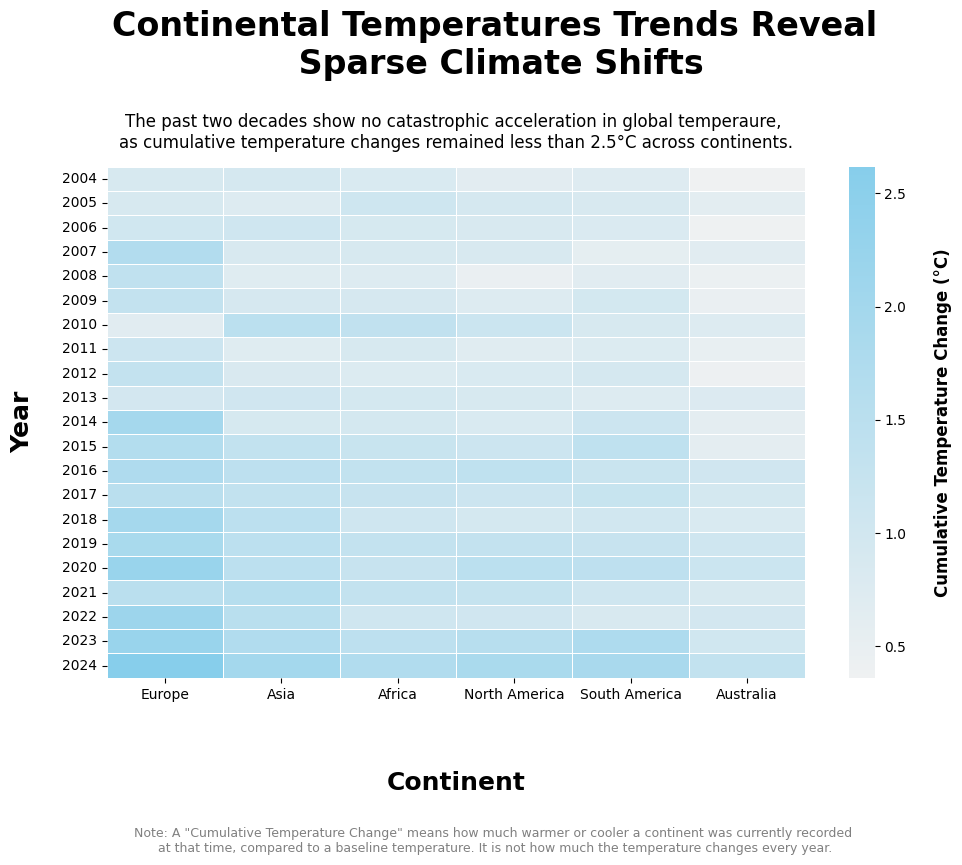

In [248]:
country_to_continent_v2 = {
    # Asia
    'Afghanistan, Islamic Rep. of': 'Asia',
    'Armenia, Rep. of': 'Asia',
    'Azerbaijan, Rep. of': 'Asia',
    'Bahrain, Kingdom of': 'Asia',
    'Bangladesh': 'Asia',
    'Bhutan': 'Asia',
    'Brunei Darussalam': 'Asia',
    'Cambodia': 'Asia',
    'China, P.R.: Hong Kong': 'Asia',
    'China, P.R.: Macao': 'Asia',
    'China, P.R.: Mainland': 'Asia',
    'Georgia': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran, Islamic Rep. of': 'Asia',
    'Iraq': 'Asia',
    'Israel': 'Asia',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan, Rep. of': 'Asia',
    'Kuwait': 'Asia',
    'Kyrgyz Republic': 'Asia',
    'Lao PDR': 'Asia',
    'Lebanon': 'Asia',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mongolia': 'Asia',
    'Myanmar': 'Asia',
    'Nepal': 'Asia',
    'North Korea': 'Asia',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Philippines': 'Asia',
    'Qatar': 'Asia',
    'Saudi Arabia': 'Asia',
    'Singapore': 'Asia',
    'South Korea': 'Asia',
    'Sri Lanka': 'Asia',
    'Syria': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'United Arab Emirates': 'Asia',
    'Uzbekistan, Rep. of': 'Asia',
    'Vietnam': 'Asia',
    'Yemen, Rep. of': 'Asia',
    
    # Africa
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Benin': 'Africa',
    'Botswana': 'Africa',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cameroon': 'Africa',
    'Central African Rep.': 'Africa',
    'Chad': 'Africa',
    'Comoros, Union of the': 'Africa',
    'Congo, Dem. Rep. of the': 'Africa',
    'Congo, Rep. of': 'Africa',
    'Djibouti': 'Africa',
    'Egypt, Arab Rep. of': 'Africa',
    'Equatorial Guinea, Rep. of': 'Africa',
    'Eritrea, The State of': 'Africa',
    'Eswatini, Kingdom of': 'Africa',
    'Ethiopia, The Federal Dem. Rep. of': 'Africa',
    'Gabon': 'Africa',
    'Gambia, The': 'Africa',
    'Ghana': 'Africa',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Ivory Coast': 'Africa',
    'Kenya': 'Africa',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Mali': 'Africa',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Rwanda': 'Africa',
    'Senegal': 'Africa',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Sudan': 'Africa',
    'Tanzania, United Rep. of': 'Africa',
    'Togo': 'Africa',
    'Tunisia': 'Africa',
    'Uganda': 'Africa',
    'Western Sahara': 'Africa',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',
    
    # North America
    'Canada': 'North America',
    'United States': 'North America',
    'Mexico': 'North America',
    'Guatemala': 'North America',
    'Belize': 'North America',
    'Honduras': 'North America',
    'El Salvador': 'North America',
    'Nicaragua': 'North America',
    'Costa Rica': 'North America',
    'Panama': 'North America',
    'Cuba': 'North America',
    'Jamaica': 'North America',
    'Dominican Rep.': 'North America',
    'Grenada': 'North America',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Trinidad and Tobago': 'North America',
    'Puerto Rico': 'North America',
    'United States Virgin Islands': 'North America',
    'Bermuda': 'North America',
    'Greenland': 'North America',
    
    # South America
    'Argentina': 'South America',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Ecuador': 'South America',
    'Guyana': 'South America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Suriname': 'South America',
    'Uruguay': 'South America',
    'Venezuela, Rep. Bolivariana de': 'South America',
    'French Guiana': 'South America',
    'Falkland Islands (Malvinas)': 'South America',
    
    # Europe
    'Albania': 'Europe',
    'Andorra, Principality of': 'Europe',
    'Austria': 'Europe',
    'Belarus, Rep. of': 'Europe',
    'Belgium': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Bulgaria': 'Europe',
    'Croatia, Rep. of': 'Europe',
    'Cyprus': 'Europe',
    'Czech Rep.': 'Europe',
    'Denmark': 'Europe',
    'Estonia, Rep. of': 'Europe',
    'Faroe Islands': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Latvia': 'Europe',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Monaco': 'Europe',
    'Montenegro': 'Europe',
    'Netherlands': 'Europe',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'San Marino': 'Europe',
    'Serbia': 'Europe',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'United Kingdom': 'Europe',
    
    # Australia
    'Australia': 'Australia',
    'Fiji, Rep. of': 'Australia',
    'Kiribati': 'Australia',
    'Marshall Islands': 'Australia',
    'Micronesia (Federated States of)': 'Australia',
    'Nauru': 'Australia',
    'New Zealand': 'Australia',
    'Palau': 'Australia',
    'Papua New Guinea': 'Australia',
    'Samoa': 'Australia',
    'Solomon Islands': 'Australia',
    'Tonga': 'Australia',
    'Tuvalu': 'Australia',
    'Vanuatu': 'Australia',
    'Wallis and Futuna Islands': 'Australia',

    # Antarctica (usually territories, no countries in Antarctica)
    'Antarctica': 'Antarctica',
}

df4 = df.copy()
df4['Continent'] = df4['Country'].map(country_to_continent_v2)
continent_order = ['Europe', 'Asia', 'Africa', 'North America', 'South America', 'Australia']

year_columns = [str(year) for year in range(2004, 2025)]
df4_filtered = df4[['Continent'] + year_columns]

df4_groupby_continent = df4_filtered.groupby('Continent')[year_columns].mean()
df4_groupby_continent = df4_groupby_continent.loc[continent_order]

plt.figure(figsize=(10, 8))

custom_cmap = sns.light_palette("skyblue", as_cmap=True)

ax = sns.heatmap(df4_groupby_continent.T, annot=False, cmap=custom_cmap, cbar=True,
                 linewidths=0.5, linecolor='white')
plt.suptitle('Continental Temperatures Trends Reveal\n Sparse Climate Shifts', fontsize=24, fontweight='bold', y=1)
plt.title('The past two decades show no catastrophic acceleration in global temperaure, \nas cumulative temperature changes remained less than 2.5°C across continents.', y=1.02)
plt.xlabel('Continent', fontsize=18, fontweight='bold', labelpad=50)
plt.ylabel('Year', fontsize=18, fontweight='bold', labelpad=20)

cbar = ax.collections[0].colorbar
cbar.set_ticks([0.5, 1.0, 1.5, 2.0, 2.5])
cbar.set_label('Cumulative Temperature Change (°C)', fontsize=12, fontweight='bold', labelpad=20)

plt.figtext(
    0.5, -0.05, 
    "Note: A \"Cumulative Temperature Change\" means how much warmer or cooler a continent was currently recorded \nat that time, compared to a baseline temperature. It is not how much the temperature changes every year.",
    wrap=True, ha='center', fontsize=9, color='gray'
)

plt.tight_layout()
plt.show()

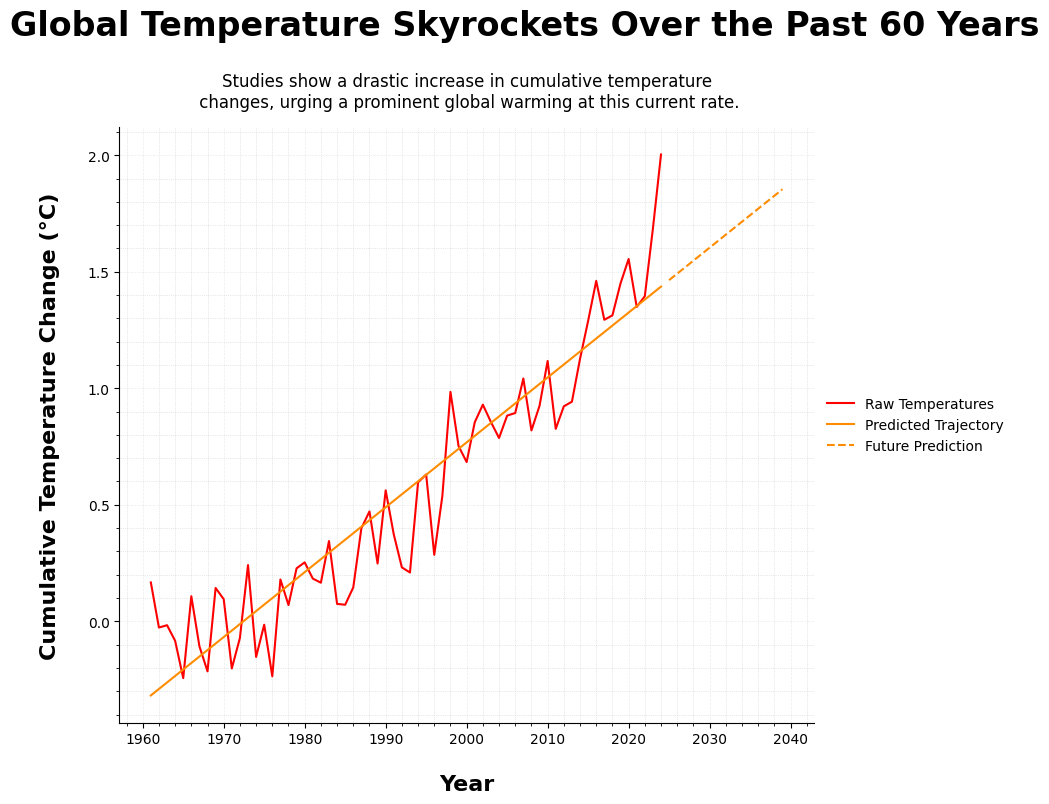

In [238]:
df3 = df.copy()
df3 = df3.drop(columns=['ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor'])
df3_melted = df3.melt(id_vars=['Country'], 
                         value_vars=[str(year) for year in range(1961, 2025)],
                         var_name='Year', 
                         value_name='TempChange')
df3_melted['Year'] = pd.to_numeric(df3_melted['Year'], errors='coerce')
df3_melted_groupby_year = df3_melted.groupby('Year')[['TempChange']].mean()
df3_melted_groupby_year.reset_index(inplace=True)

X = df3_melted_groupby_year['Year'].values.reshape(-1, 1)
y = df3_melted_groupby_year['TempChange'].values

model = LinearRegression()
model.fit(X, y)

predicted_temp = model.predict(X)
future_years = np.arange(2025, 2040).reshape(-1, 1)
future_predicted_temp = model.predict(future_years)

plt.figure(figsize=(10, 8))
sns.lineplot(data=df3_melted_groupby_year, x='Year', y='TempChange', color='red', label="Raw Temperatures")
plt.plot(df3_melted_groupby_year['Year'], predicted_temp, color='darkorange', linestyle='-', label='Predicted Trajectory')
plt.plot(future_years, future_predicted_temp, color='darkorange', linestyle='--', label='Future Prediction')

plt.suptitle('Global Temperature Skyrockets Over the Past 60 Years', fontsize=24, fontweight='bold', y=1)
plt.title('Studies show a drastic increase in cumulative temperature\n changes, urging a prominent global warming at this current rate.', y=1.02)
plt.xlabel('Year', fontsize=16, fontweight='bold', labelpad=20)
plt.ylabel('Cumulative Temperature Change (°C)', fontsize=16, fontweight='bold', labelpad=20)
plt.grid(True, color='lightgray', alpha=0.5)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(True, which='both', axis='both', color='lightgray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(True, which='minor', axis='both', color='lightgray', linestyle=':', linewidth=0.5)

peak_year_bin = df3_melted_groupby_year['Year'][df3_melted_groupby_year['TempChange'].idxmax()]
peak_temp = df3_melted_groupby_year['TempChange'].max()

plt.legend(
    bbox_to_anchor=(1, 0.5),
    loc='center left',
    frameon=False
)

plt.tight_layout()
plt.show()